<a href="https://colab.research.google.com/github/Astro-Beam/ASTRO/blob/main/Neural%20Networks/Autoencoder%20Components/Training%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset

#Steps for generating the signal

We firstly create a function that generates a random wave, composed of a sin and a cos function.

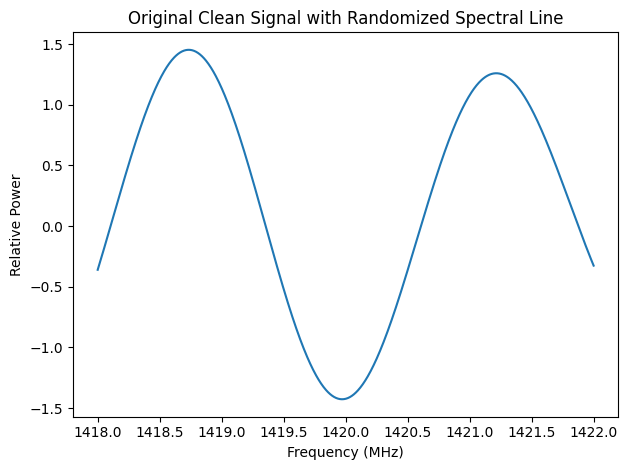

In [ ]:
def generate_signal(n_samples):
    freq_range = np.linspace(1418, 1422, n_samples)

    # Add randomness to the background signal generation
    random_factor1 = np.random.uniform(0.05, 0.5)
    random_factor2 = np.random.uniform(0.05, 0.5)
    signal = (np.sin(2 * np.pi * random_factor1 * freq_range) + random_factor2 * np.sin(2 * np.pi * random_factor2 * freq_range))

    return signal

# Generate the signal
n_samples = 1000
freq_range = np.linspace(1418, 1422, n_samples)
signal = generate_signal(n_samples)

# Plot the clean signal
plt.plot(freq_range, signal)
plt.title("Original Clean Signal with Randomized Spectral Line")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")

# Show the plots
plt.tight_layout()
plt.show()

We then add the spectral line at 1420 MHz.

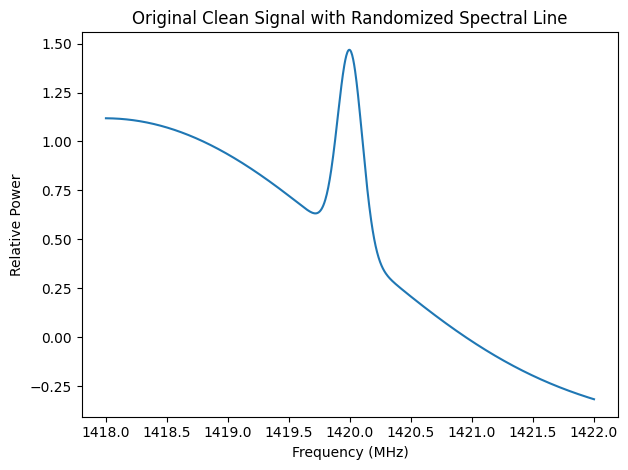

In [ ]:
def generate_signal(n_samples):
    freq_range = np.linspace(1418, 1422, n_samples)

    # Add randomness to the background signal generation
    random_factor1 = np.random.uniform(0.05, 0.5)
    random_factor2 = np.random.uniform(0.05, 0.5)
    signal = (np.sin(2 * np.pi * random_factor1 * freq_range) + random_factor2 * np.sin(2 * np.pi * random_factor2 * freq_range))

    # Add the spectral line at 1420 MHz
    spectral_line_shape = np.exp(-0.5 * ((freq_range - 1420) / 0.1)**2)
    signal += spectral_line_shape

    return signal

# Generate the signal
n_samples = 1000
freq_range = np.linspace(1418, 1422, n_samples)
signal = generate_signal(n_samples)

# Plot the clean signal
plt.plot(freq_range, signal)
plt.title("Original Clean Signal with Randomized Spectral Line")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")

# Show the plots
plt.tight_layout()
plt.show()

To introduce more variance to the signal, we make it so that the spectral line is not found at a specific frequency, but somewhere in the range of 1419.9 to 1420.1 MHz. We have to note that the range is **arbitrary** and has no scientific significance.

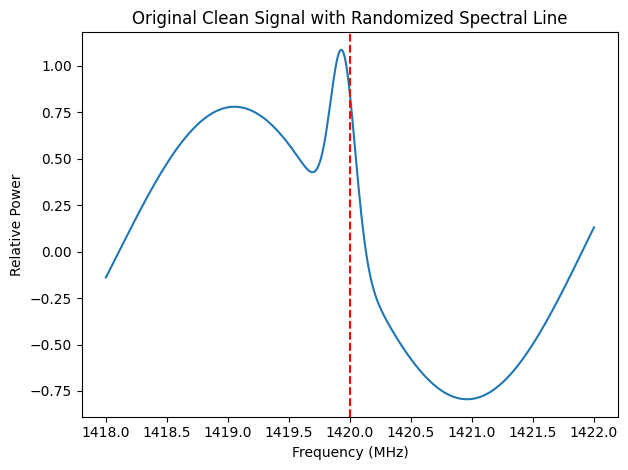

In [ ]:
def generate_signal(n_samples):
    freq_range = np.linspace(1418, 1422, n_samples)

    # Add randomness to the background signal generation
    random_factor1 = np.random.uniform(0.05, 0.5)
    random_factor2 = np.random.uniform(0.05, 0.5)
    signal = (np.sin(2 * np.pi * random_factor1 * freq_range) + random_factor2 * np.sin(2 * np.pi * random_factor2 * freq_range))

    # Randomize the spectral line position between 1419.9 and 1420.1 MHz
    spectral_line_center = np.random.uniform(1419.9, 1420.1)

    # Add the spectral line at the random frequency
    spectral_line_shape = np.exp(-0.5 * ((freq_range - spectral_line_center) / 0.1)**2)
    signal += spectral_line_shape

    return signal

# Generate the signal
n_samples = 1000
freq_range = np.linspace(1418, 1422, n_samples)
signal = generate_signal(n_samples)

# Plot the clean signal
plt.plot(freq_range, signal)
plt.title("Original Clean Signal with Randomized Spectral Line")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")

#Plot a vertical line at 1420 MHz to show variance
plt.axvline(x=1420, color='r', linestyle='--')

# Show the plots
plt.tight_layout()
plt.show()

For even more variance, we make it so that the spectral line has a random height, by introducing an "amplitude" factor. We have to note that the amplitude values are **arbitrary** and have no scientific significance.

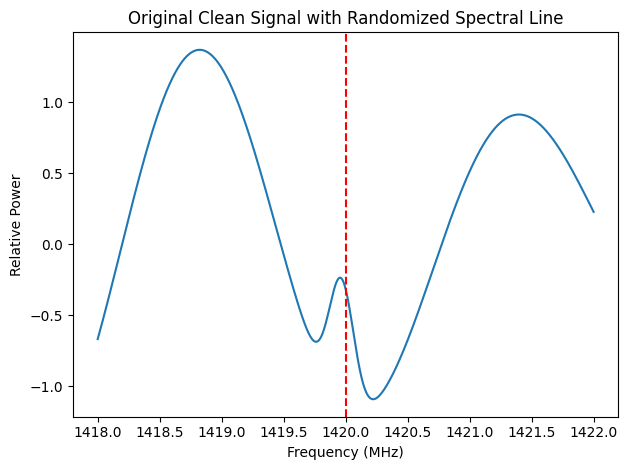

In [ ]:
def generate_signal(n_samples):
    freq_range = np.linspace(1418, 1422, n_samples)

    # Add randomness to the background signal generation
    random_factor1 = np.random.uniform(0.05, 0.5)
    random_factor2 = np.random.uniform(0.05, 0.5)
    signal = (np.sin(2 * np.pi * random_factor1 * freq_range) + random_factor2 * np.sin(2 * np.pi * random_factor2 * freq_range))

    # Randomize the spectral line position between 1419.9 and 1420.1 MHz
    spectral_line_center = np.random.uniform(1419.9, 1420.1)

    #Randomize the spectral line height
    spectral_line_amplitude = np.random.uniform(0.7, 1.2)

    # Add the spectral line at the random frequency
    spectral_line_shape = spectral_line_amplitude * np.exp(-0.5 * ((freq_range - spectral_line_center) / 0.1)**2)
    signal += spectral_line_shape

    return signal

# Generate the signal
n_samples = 1000
freq_range = np.linspace(1418, 1422, n_samples)
signal = generate_signal(n_samples)

# Plot the clean signal
plt.plot(freq_range, signal)
plt.title("Original Clean Signal with Randomized Spectral Line")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")

#Plot a vertical line at 1420 MHz to show variance
plt.axvline(x=1420, color='r', linestyle='--')

# Show the plots
plt.tight_layout()
plt.show()

We then add gaussian noise of random intensity to simulate a real-world scenario. The values for the noise are, once again, arbitrary.

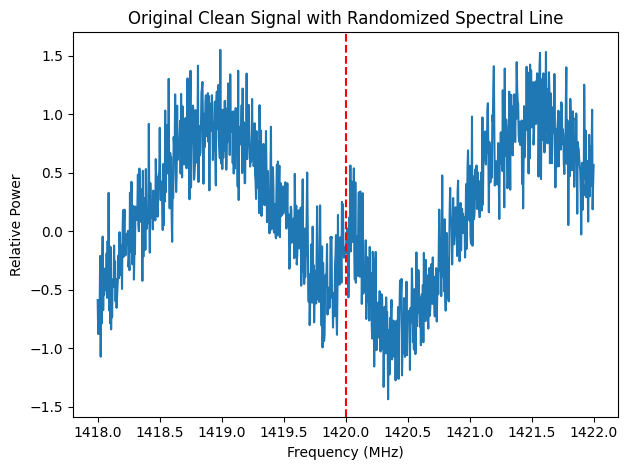

In [ ]:
def generate_signal(n_samples):
    freq_range = np.linspace(1418, 1422, n_samples)

    # Add randomness to the background signal generation
    random_factor1 = np.random.uniform(0.05, 0.5)
    random_factor2 = np.random.uniform(0.05, 0.5)
    signal = (np.sin(2 * np.pi * random_factor1 * freq_range) + random_factor2 * np.sin(2 * np.pi * random_factor2 * freq_range))

    # Randomize the spectral line position between 1419.9 and 1420.1 MHz
    spectral_line_center = np.random.uniform(1419.9, 1420.1)

    #Randomize the spectral line height
    spectral_line_amplitude = np.random.uniform(0.7, 1.2)

    # Add the spectral line at the random frequency
    spectral_line_shape = spectral_line_amplitude * np.exp(-0.5 * ((freq_range - spectral_line_center) / 0.1)**2)
    signal += spectral_line_shape

    # Add random gaussian noise with μ = 0, random σ
    noise_amplitude = np.random.uniform(0.1, 0.3)
    noise = np.random.normal(0, noise_amplitude, len(signal))
    signal += noise

    return signal

# Generate the signal
n_samples = 1000
freq_range = np.linspace(1418, 1422, n_samples)
signal = generate_signal(n_samples)

# Plot the clean signal
plt.plot(freq_range, signal)
plt.title("Original Clean Signal with Randomized Spectral Line")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")

#Plot a vertical line at 1420 MHz to show variance
plt.axvline(x=1420, color='r', linestyle='--')

# Show the plots
plt.tight_layout()
plt.show()

We normalize the signal for easier handling by the autoencoder.

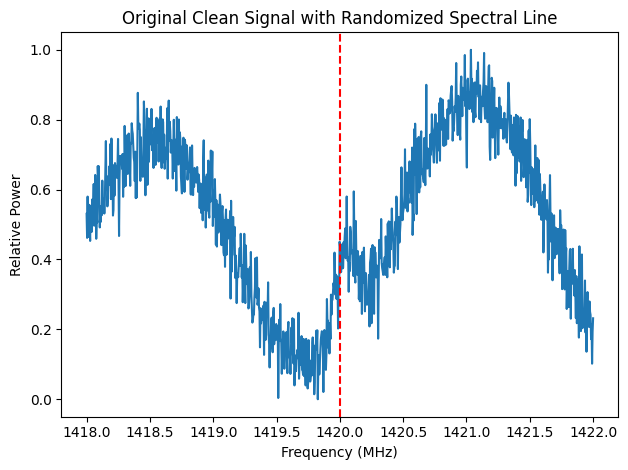

In [ ]:
def generate_signal(n_samples):
    freq_range = np.linspace(1418, 1422, n_samples)

    # Add randomness to the background signal generation
    random_factor1 = np.random.uniform(0.05, 0.5)
    random_factor2 = np.random.uniform(0.05, 0.5)
    signal = (np.sin(2 * np.pi * random_factor1 * freq_range) + random_factor2 * np.sin(2 * np.pi * random_factor2 * freq_range))

    # Randomize the spectral line position between 1419.9 and 1420.1 MHz
    spectral_line_center = np.random.uniform(1419.9, 1420.1)

    #Randomize the spectral line height
    spectral_line_amplitude = np.random.uniform(0.7, 1.2)

    # Add the spectral line at the random frequency
    spectral_line_shape = spectral_line_amplitude * np.exp(-0.5 * ((freq_range - spectral_line_center) / 0.1)**2)
    signal += spectral_line_shape

    # Add random gaussian noise with μ = 0, random σ
    noise_amplitude = np.random.uniform(0.1, 0.3)
    noise = np.random.normal(0, noise_amplitude, len(signal))
    signal += noise

    # Normalize the signal to have a maximum value of 1
    signal = signal + np.abs(np.min(signal))
    signal = signal / np.max(np.abs(signal))

    return signal

# Generate the signal
n_samples = 1000
freq_range = np.linspace(1418, 1422, n_samples)
signal = generate_signal(n_samples)

# Plot the clean signal
plt.plot(freq_range, signal)
plt.title("Original Clean Signal with Randomized Spectral Line")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")

#Plot a vertical line at 1420 MHz to show variance
plt.axvline(x=1420, color='r', linestyle='--')

# Show the plots
plt.tight_layout()
plt.show()

# Multiple Spectral Lines

## Comments

However, things aren't always so simple. A signal may have 2 (or more!) spectral lines embedded into it. Therefore, we should cater for these cases with the addition of more functions that add more spectral lines to our signal.

However, it is easy to notice that by doing that, the problem becomes very complex, difficult for an autoencoder (or us...) to handle. For that reason, we will simplify it, without depriving it of its scientific correctness.

So, let's think the problem again:
* We will firstly have a "base" function, that generates the background signal.

* Secondly, we will define 3 regions within the signal, where spectral lines may exist. Lets say that these areas are [1418.2 - 1419.3], [1419.7 - 1420.5], and [1420.7 - 1421.5]. We should note that these regions are arbitrary, but could easily acquire scientific significance if they are set to correspond to actual regions where spectral lines of specific elements can be found.

* However, for the addition of these spectral lines, we can't have only one function with varying chances of adding a spectral line at a specific area of the signal (that would make the training process of the autoencoder unpredictable!). So, we will create 3 functions, each taking the background signal as input, and then adding a spectral line to its corresponding region.

However, to cater for the demand of 2 or more spectral lines that we made in the beginning, we can't just randomly run two of the functions stated above, since, then, the same function may run twice, adding a spectral line at the same region twice. If the second spectral line is added indistinguishably close to the first one, then the pipeline is expected to classify and reconstruct 2 spectral lines, which is virtually impossible.  Therefore, we will subdivide each one of the aforementioned regions into 2 smaller regions, so that, in the case we want to add 2 spectral lines within the same region, we will be able to do so without them overlapping. So, after these remarks, we will then have:

* The new regions:
  1. [1418.2 - 1419.8] and [1419.8 - 1419.3]
  2. [1419.7 - 1420.1] and [1420.1 - 1420.5]
  3. [1420.7 - 1421.1] and [1421.1 - 1421.5]

* 6 functions, each adding a spectral line to its corresponding region.

* 3 more functions, each calling a pair of the previous functions, so that we can add two spectral lines within the same region "safely", as we mentioned in the note above.

#Final signal-generating functions

Signal WITHOUT spectral line.

In [ ]:
def generate_background_signal(n_samples):
    freq_range = np.linspace(1418, 1422, n_samples)

    # Random background signal generation
    signal = (np.sin(2 * np.pi *  np.random.uniform(0.05, 0.5) * freq_range) + np.random.uniform(0.05, 0.5) * np.sin(2 * np.pi * np.random.uniform(0.05, 0.5) * freq_range))

    # Add random gaussian noise
    signal += np.random.normal(0, np.random.uniform(0.1, 0.3), len(signal))

    # Normalize the signal
    signal += np.abs(np.min(signal))
    signal /= np.max(np.abs(signal))

    return signal

Signal WITH spectral line.

In [ ]:
def generate_signal(n_samples):
    freq_range = np.linspace(1418, 1422, n_samples)

    # Add randomness to the background signal generation
    signal = (np.sin(2 * np.pi * np.random.uniform(0.05, 0.5) * freq_range) + np.random.uniform(0.05, 0.5) * np.sin(2 * np.pi * np.random.uniform(0.05, 0.5) * freq_range))

    # Add the spectral line at the random frequency
    signal += np.random.uniform(0.7, 1.2) * np.exp(-0.5 * ((freq_range - np.random.uniform(1419.9, 1420.1)) / 0.1)**2)

    # Add random gaussian noise with μ = 0, random σ
    signal += np.random.normal(0, np.random.uniform(0.1, 0.3), len(signal))

    # Normalize the signal to have a maximum value of 1
    signal += np.abs(np.min(signal))
    signal /= np.max(np.abs(signal))

    return signal

#Create the training dataset

* `# Convert to PyTorch tensors` - A torch.tensor is a multi-dimensional matrix containing elements of a single data type. We convert the data into a PyTorch tensor in order to feed this data into PyTorch models, such as our autoencoder, and use it for forward passes, training, and evaluation.
* `torch.float32` - It means that each element in the tensor will be stored as a 32-bit floating point number (a common data type for numeric operations in neural networks). It ensures that the data is in a format suitable for floating-point computations, which is critical for training neural networks in PyTorch since most deep learning operations work with floating point numbers.
* `# Batch size` - Batch size is a hyperparameter that defines the number of samples for the autoencoder to work through before updating internal model parameters

In [ ]:
# Generate a dataset of signals with spectral lines
n_signals = 3000  # Number of signals to generate
signals = np.array([generate_signal(n_samples) for _ in range(n_signals)])

# Convert to PyTorch tensors
signals_tensor = torch.tensor(signals, dtype=torch.float32)

# Create a DataLoader for batching
batch_size = 64 # Batch size
dataset = TensorDataset(signals_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)